In [1116]:
import warnings
warnings.filterwarnings("ignore")

In [1117]:
#Importing the relevant libraries
import numpy as np, pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

In [1118]:
#Load the Data
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 1. Data Analysis

In [1119]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [1120]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### 1.1 Data Imputing & Cleaning

In [1121]:
# Checking the missing values
round(leads.isnull().sum()/len(leads)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

Removing the Asymmetrique rows which are null as these are assigned basis user activity and imputing this using mean or any other distribution mechanism would skew the final model. As there is no concrete formula or mechanism on these numbers it is best to impute the null values

In [1122]:
leads = leads.loc[~leads['Asymmetrique Profile Score'].isnull()]

Setting the Lead Profile select values as null

In [1123]:
leads.loc[leads['Lead Profile'] =='Select', 'Lead Profile'] = np.nan

In [1124]:
# Checking the missing values post imputing the missing Asymmetrique values
round(leads.isnull().sum()/len(leads)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.38
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.73
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.73
Last Activity                                     1.19
Country                                          25.67
Specialization                                   15.37
How did you hear about X Education               23.26
What is your current occupation                  28.67
What matters most to you in choosing a course    28.75
Search                                            0.00
Magazine                                          0.00
Newspaper 

Removing following columns
- Tags, Lead Quality, Lead Profile as these look more like textual characterisations which can be defined by the final model and has high null values
- For an online company which is focused on delivering content irrespective of the city or country which is the USP hence removing City & Country

In [1125]:
leads.drop(['Tags', 'City', 'Country', 'Lead Quality', 'Lead Profile'],axis=1, inplace=True)

In [1126]:
# checking the missing values post removing above columns
round(leads.isnull().sum()/len(leads)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.38
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.73
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.73
Last Activity                                     1.19
Specialization                                   15.37
How did you hear about X Education               23.26
What is your current occupation                  28.67
What matters most to you in choosing a course    28.75
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

Checking the data distribution for 'What matters most to you in choosing a course' columns and taking measures to impute the missing values

In [1127]:
leads['What matters most to you in choosing a course'].astype('category').value_counts()

Better Career Prospects      3576
Other                           1
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64

As the column distribution is heavily skewed towards 'Better Career Prospects' setting the same for all the null values

In [1128]:
leads['What matters most to you in choosing a course'].fillna(value=leads['What matters most to you in choosing a course'].
                                                              mode()[0], inplace=True)

As the column distribution is not uniform using percentage distribution to fill the null values for 'What is your current occupation' column

In [1129]:
leads['What is your current occupation'].astype('category').value_counts()

Unemployed              3078
Working Professional     393
Student                   97
Businessman                6
Other                      5
Housewife                  3
Name: What is your current occupation, dtype: int64

In [1130]:
total_rec = leads['What is your current occupation'].astype('category').value_counts().sum()
unemployed_perc = round(3078/total_rec,2)
working_perc = round(393/total_rec,2)
student_perc = round(97/total_rec,2)
business_perc = round(6/total_rec,2)
other_perc = round(5/total_rec,2)
housewife = round(3/total_rec,2)
occ_null_sum = len(leads.loc[leads['What is your current occupation'].isnull()])

leads['What is your current occupation'].fillna(value='Unemployed',limit=int(round(occ_null_sum*unemployed_perc,0)),
                                                inplace=True)
leads['What is your current occupation'].fillna(value='Working Professional',limit=int(round(occ_null_sum*working_perc,0)), 
                                                inplace=True)
leads['What is your current occupation'].fillna(value='Student',limit=int(round(occ_null_sum*student_perc,0)), inplace=True)
leads['What is your current occupation'].fillna(value='Business',limit=1, inplace=True)

Setting the Select values to null in 'How did your hear about X Education' & 'Specialization' columns

In [1131]:
leads.loc[leads['How did you hear about X Education'] =='Select', 'How did you hear about X Education'] = np.nan
leads.loc[leads['Specialization'] =='Select', 'Specialization'] = np.nan

Post setting the values for the above columns checking the missing values

In [1132]:
round(leads.isnull().sum()/len(leads)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.38
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.73
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.73
Last Activity                                     1.19
Specialization                                   37.32
How did you hear about X Education               77.98
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

- 'How did you hear about X Education' has close to 78% null values post imputing the select to null its best to drop the column. 
- As 'Specialization' has close to 37% null values post imputing the select to null its best to drop the column.

In [1133]:
leads.drop(['How did you hear about X Education','Specialization'], axis=1, inplace=True)

Imputing the 'Total Visits' column.

In [1134]:
leads['TotalVisits'].astype('category').value_counts()

0.0      1132
2.0       916
3.0       687
4.0       588
5.0       438
6.0       273
1.0       213
7.0       186
8.0       123
9.0        98
10.0       65
11.0       54
13.0       31
12.0       28
14.0       19
15.0       11
16.0       11
17.0       11
18.0        9
20.0        8
19.0        5
23.0        5
21.0        4
27.0        4
24.0        3
25.0        3
22.0        2
29.0        2
42.0        1
43.0        1
55.0        1
30.0        1
28.0        1
141.0       1
Name: TotalVisits, dtype: int64

Removing the outlier 141 as it doesnt look correct

In [1135]:
leads = leads.loc[leads['TotalVisits']!=141]

Setting the missing values with mode values using an interval for a Total Time Spent on website of 500 for TotalVisits & 'Page Views Per Visit' columns

In [1136]:
leads.loc[(leads['Total Time Spent on Website']>=0) & (leads['Total Time Spent on Website']<500) & 
         (leads['TotalVisits'].isnull()),['TotalVisits']] = leads.loc[(leads['Total Time Spent on Website']>=0) & 
                                                                      (leads['Total Time Spent on Website']<500) & 
                                                                      ~(leads['TotalVisits'].isnull())]['TotalVisits'].mode()[0]

leads.loc[(leads['Total Time Spent on Website']>=500) & (leads['Total Time Spent on Website']<1000) & 
         (leads['TotalVisits'].isnull()),['TotalVisits']] = leads.loc[(leads['Total Time Spent on Website']>=500) & 
                                                                      (leads['Total Time Spent on Website']<1000) & 
                                                                      ~(leads['TotalVisits'].isnull())]['TotalVisits'].mode()[0]

leads.loc[(leads['Total Time Spent on Website']>=1000) & (leads['Total Time Spent on Website']<1500) & 
         (leads['TotalVisits'].isnull()),['TotalVisits']] = leads.loc[(leads['Total Time Spent on Website']>=1000) & 
                                                                      (leads['Total Time Spent on Website']<1500) & 
                                                                      ~(leads['TotalVisits'].isnull())]['TotalVisits'].mode()[0]

leads.loc[(leads['Total Time Spent on Website']>=1500) & (leads['Total Time Spent on Website']<2000) & 
         (leads['TotalVisits'].isnull()),['TotalVisits']] = leads.loc[(leads['Total Time Spent on Website']>=1500) & 
                                                                      (leads['Total Time Spent on Website']<2000) & 
                                                                      ~(leads['TotalVisits'].isnull())]['TotalVisits'].mode()[0]

leads.loc[(leads['Total Time Spent on Website']>=2000) &
          (leads['TotalVisits'].isnull()),['TotalVisits']] = leads.loc[(leads['Total Time Spent on Website']>=2000) & 
                                                                      ~(leads['TotalVisits'].isnull())]['TotalVisits'].mode()[0]

In [1137]:
leads.loc[(leads['Total Time Spent on Website']>=0) & (leads['Total Time Spent on Website']<500) & 
         (leads['Page Views Per Visit'].isnull()),['Page Views Per Visit']] = leads.loc[(leads['Total Time Spent on Website']>=0) & 
                                                                      (leads['Total Time Spent on Website']<500) & 
                                                                      ~(leads['Page Views Per Visit'].isnull())]['Page Views Per Visit'].mode()[0]

leads.loc[(leads['Total Time Spent on Website']>=500) & (leads['Total Time Spent on Website']<1000) & 
         (leads['Page Views Per Visit'].isnull()),['Page Views Per Visit']] = leads.loc[(leads['Total Time Spent on Website']>=500) & 
                                                                      (leads['Total Time Spent on Website']<1000) & 
                                                                      ~(leads['Page Views Per Visit'].isnull())]['Page Views Per Visit'].mode()[0]

leads.loc[(leads['Total Time Spent on Website']>=1000) & (leads['Total Time Spent on Website']<1500) & 
         (leads['Page Views Per Visit'].isnull()),['Page Views Per Visit']] = leads.loc[(leads['Total Time Spent on Website']>=1000) & 
                                                                      (leads['Total Time Spent on Website']<1500) & 
                                                                      ~(leads['Page Views Per Visit'].isnull())]['Page Views Per Visit'].mode()[0]

leads.loc[(leads['Total Time Spent on Website']>=1500) & (leads['Total Time Spent on Website']<2000) & 
         (leads['Page Views Per Visit'].isnull()),['Page Views Per Visit']] = leads.loc[(leads['Total Time Spent on Website']>=1500) & 
                                                                      (leads['Total Time Spent on Website']<2000) & 
                                                                      ~(leads['Page Views Per Visit'].isnull())]['Page Views Per Visit'].mode()[0]

leads.loc[(leads['Total Time Spent on Website']>=2000) &
          (leads['Page Views Per Visit'].isnull()),['Page Views Per Visit']] = leads.loc[(leads['Total Time Spent on Website']>=2000) & 
                                                                      ~(leads['Page Views Per Visit'].isnull())]['Page Views Per Visit'].mode()[0]

Last Activity column with null values as these are actions defined by user which cannot be imputed by any logical formula

In [1138]:
leads = leads.loc[~leads['Last Activity'].isnull()]

Imputing the Lead Source column using mode attirbutes with the help of Lear Origin column to keep the distributione even

In [1139]:
leads.loc[leads['Lead Source'].isnull()]['Lead Origin'].astype('category').value_counts()

Lead Add Form     16
Quick Add Form     1
Lead Import        1
Name: Lead Origin, dtype: int64

In [1140]:
leads.loc[leads['Lead Origin'] == 'Lead Import']['Lead Source'].astype('category').value_counts()

Facebook    38
Name: Lead Source, dtype: int64

In [1141]:
leads.loc[(leads['Lead Origin'] == 'Lead Import') & (leads['Lead Source'].isnull()),['Lead Source']] = leads.loc[
    leads['Lead Origin'] == 'Lead Import']['Lead Source'].mode()[0]

In [1142]:
leads.loc[leads['Lead Origin'] == 'Quick Add Form']['Lead Source'].astype('category').value_counts()



Series([], Name: Lead Source, dtype: int64)

In [1143]:
leads = leads.loc[leads['Lead Origin'] != 'Quick Add Form']

In [1144]:
leads.loc[leads['Lead Origin'] == 'Lead Add Form']['Lead Source'].astype('category').value_counts()

Reference           230
Welingak Website     66
Live Chat             2
Click2call            2
Olark Chat            1
Google                1
Name: Lead Source, dtype: int64

In [1145]:
leads.loc[(leads['Lead Origin'] == 'Lead Add Form') & (leads['Lead Source'].isnull()),['Lead Source']] = leads.loc[
    leads['Lead Origin'] == 'Lead Add Form']['Lead Source'].mode()[0]

Final check of missing values

In [1146]:
round(leads.isnull().sum()/len(leads)*100,2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

### 1.2 Outlier Analysis

In [1147]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000
mean,620566.326210,0.376008,3.513710,490.884677,2.393024,14.313508,16.338911
std,29371.024608,0.484431,3.711329,547.834084,2.209746,1.392769,1.804595
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,588717.250000,0.000000,1.000000,18.000000,1.000000,14.000000,15.000000
50%,635356.500000,0.000000,3.000000,254.500000,2.000000,14.000000,16.000000
75%,646401.500000,1.000000,5.000000,934.250000,3.250000,15.000000,18.000000
max,660737.000000,1.000000,55.000000,2253.000000,55.000000,18.000000,20.000000


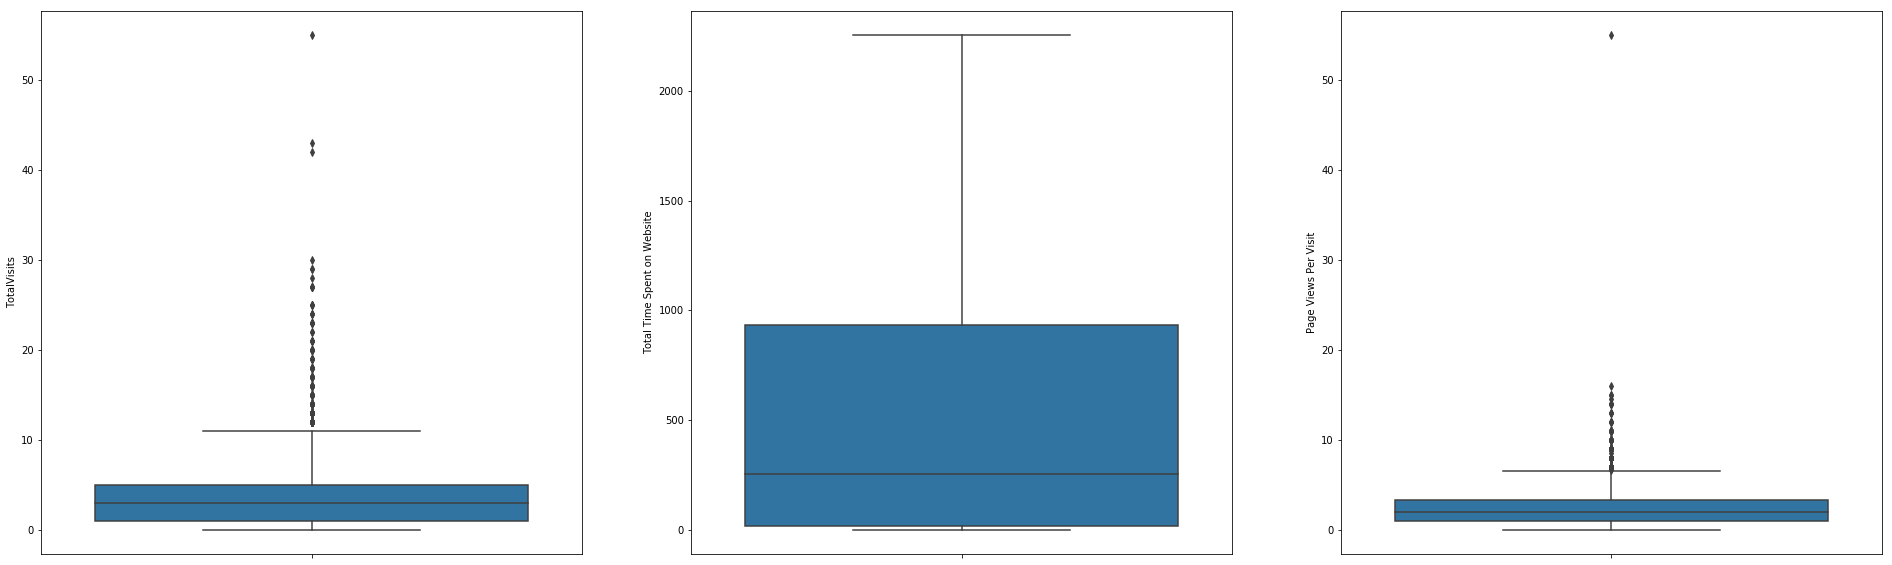

In [1148]:
plt.figure(figsize=(33, 10))
plt.subplot(1,3,1)
sns.boxplot(y='TotalVisits',data=leads)
plt.subplot(1,3,2)
sns.boxplot(y='Total Time Spent on Website',data=leads)
plt.subplot(1,3,3)
sns.boxplot(y='Page Views Per Visit',data=leads)
plt.show()

In [1149]:
Q1_visits = leads.TotalVisits.quantile(0.05)
Q3_visits = leads.TotalVisits.quantile(0.95)
IQR_visits = Q3_visits - Q1_visits

Q1_page = leads['Page Views Per Visit'].quantile(0.05)
Q3_page = leads['Page Views Per Visit'].quantile(0.95)
IQR_page = Q3_page - Q1_page

leads = leads.loc[(leads['TotalVisits'] >= Q1_visits - 1.5*IQR_visits) & (leads['TotalVisits']<= Q3_visits + 1.5*IQR_visits)]
leads = leads.loc[(leads['Page Views Per Visit'] >= Q1_page - 1.5*IQR_page) & (leads['Page Views Per Visit']
                                                                                  <= Q3_page + 1.5*IQR_page)]

In [1150]:
# Checking the final shape for the analysis
leads.shape

(4948, 30)

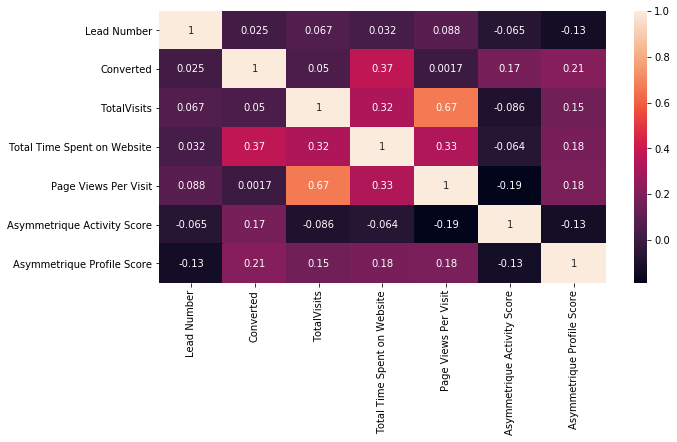

In [1151]:
plt.figure(figsize=[10,5])
sns.heatmap(leads.corr(),annot=True)
plt.show()

Resetting the index post filtering the data

In [1152]:
leads = leads.reset_index() 
leads.drop(['index'],axis=1,inplace=True)

In [1153]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,02.Medium,01.High,15.0,18.0,No,No,Modified


### 1.3 Cleaning Data

In [1154]:
# removing unnecessary 01.,02. & 03.
leads['Asymmetrique Activity Index'] = leads['Asymmetrique Activity Index'].apply(lambda x : x.split('.')[1])
leads['Asymmetrique Profile Index'] = leads['Asymmetrique Profile Index'].apply(lambda x : x.split('.')[1])

In [1155]:
leads.loc[leads.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [1156]:
leads.nunique(axis=0)

Prospect ID                                      4948
Lead Number                                      4948
Lead Origin                                         4
Lead Source                                        18
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        26
Total Time Spent on Website                      1447
Page Views Per Visit                               86
Last Activity                                      16
What is your current occupation                     7
What matters most to you in choosing a course       2
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  1
Newspaper                                           1
Digital Advertisement       

Removing Binary columns 'Magazine', 'X Education Forums', 'Newspaper','Receive More Updates About Our Courses', 'Update me on Supply Chain Content' 'Get updates on DM Content' & 'I agree to pay the amount through cheque' as they have no variation in data and doesnt make sense to include them in the model building as these have same values

In [1157]:
leads.drop(['Magazine','X Education Forums', 'Newspaper','Receive More Updates About Our Courses',
            'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque'], 
           axis=1, inplace=True)

### 1.4 Creating Dummy variables for Binary columns

In [1158]:
binaryList = ['Do Not Email','Do Not Call','Search','Newspaper Article', 'Digital Advertisement','Through Recommendations',
              'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

leads[binaryList] = leads[binaryList].apply(binary_map)



### 1.5 Creating Dummy variables for Categorical Columns

In [1159]:
dummy_col_list = ['Lead Origin','Lead Source','Last Activity','Asymmetrique Activity Index','Asymmetrique Profile Index',
                  'Last Notable Activity']
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy_1 = pd.get_dummies(leads[dummy_col_list], drop_first=True)
# Adding the results to the master dataframe
leads = pd.concat([leads, dummy_1], axis=1)

dummy_2 = pd.get_dummies(leads['What is your current occupation'], prefix='Occupation')
#Dropping the Other option
dummy_2 = dummy_2.drop(['Occupation_Other'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,dummy_2], axis=1)

dummy_3 = pd.get_dummies(leads['What matters most to you in choosing a course'], prefix='CourseChoice')
#Dropping the Other option
dummy_3 = dummy_3.drop(['CourseChoice_Other'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,dummy_3], axis=1)

In [1160]:
leads.drop(dummy_col_list, axis=1, inplace=True)
leads.drop(['What is your current occupation','What matters most to you in choosing a course'], axis=1, inplace=True)

In [1161]:
leads.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Digital Advertisement,...,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Occupation_Business,Occupation_Businessman,Occupation_Housewife,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,CourseChoice_Better Career Prospects
count,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,...,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000
mean,620572.688157,0.071140,0.000404,0.376314,3.445432,491.323363,2.373603,0.001415,0.000202,0.000404,...,0.165926,0.004648,0.004850,0.000202,0.001213,0.000606,0.027688,0.860550,0.108731,0.999798
std,29377.496114,0.257084,0.020103,0.484509,3.413083,548.233823,2.061889,0.037590,0.014216,0.020103,...,0.372051,0.068027,0.069483,0.014216,0.034805,0.024618,0.164094,0.346451,0.311333,0.014216
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,588717.250000,0.000000,0.000000,0.000000,1.000000,17.750000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,635376.000000,0.000000,0.000000,0.000000,3.000000,254.500000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,646412.250000,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,660737.000000,1.000000,1.000000,1.000000,25.000000,2253.000000,15.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1162]:
# Checking the current Conversion Rate
converted_rate = (sum(leads['Converted'])/len(leads['Converted'].index))*100
round(converted_rate,2)

37.63

## 2 Setting the Train & Test Data 

In [1163]:
# Settign the Lead Number as index
leads_ln = leads.set_index(['Lead Number'])

In [1164]:
# Putting independent variables to X
X = leads_ln.drop(['Prospect ID','Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Digital Advertisement,Through Recommendations,Asymmetrique Activity Score,...,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Occupation_Business,Occupation_Businessman,Occupation_Housewife,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,CourseChoice_Better Career Prospects
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0.0,0,0.0,0,0,0,0,15.0,...,0,0,0,0,0,0,0,1,0,1
660728,0,0,5.0,674,2.5,0,0,0,0,15.0,...,0,0,0,0,0,0,0,1,0,1
660727,0,0,2.0,1532,2.0,0,0,0,0,14.0,...,0,0,0,0,0,0,1,0,0,1
660719,0,0,1.0,305,1.0,0,0,0,0,13.0,...,0,0,0,0,0,0,0,1,0,1
660681,0,0,2.0,1428,1.0,0,0,0,0,15.0,...,0,0,0,0,0,0,0,1,0,1


In [1165]:
# Putting target variable to y
y = leads_ln['Converted']

y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [1166]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## 3 Scaling of numeric data

In [1167]:
scaleList = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score',
             'Asymmetrique Profile Score']
scaler = StandardScaler()
X_train[scaleList] = scaler.fit_transform(X_train[scaleList])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Digital Advertisement,Through Recommendations,Asymmetrique Activity Score,...,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Occupation_Business,Occupation_Businessman,Occupation_Housewife,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,CourseChoice_Better Career Prospects
Lead Number,,,,,,,,,,,,,,,,,,,,,
643040,0,0,0.733875,-0.876722,1.759213,0,0,0,0,-0.222913,...,0,0,0,0,0,0,0,1,0,1
584198,1,0,-0.990479,-0.885777,-1.141592,0,0,0,0,-0.935040,...,1,0,0,0,0,0,0,1,0,1
648886,0,0,-0.990479,-0.885777,-1.141592,0,0,0,0,1.913470,...,0,0,0,0,0,0,0,1,0,1
650892,0,0,4.182583,-0.778923,0.100919,0,0,0,0,-0.222913,...,0,0,0,0,0,0,0,1,0,1
581167,0,0,-0.128302,-0.657581,0.308810,0,0,0,0,-0.222913,...,1,0,0,0,0,0,0,1,0,1


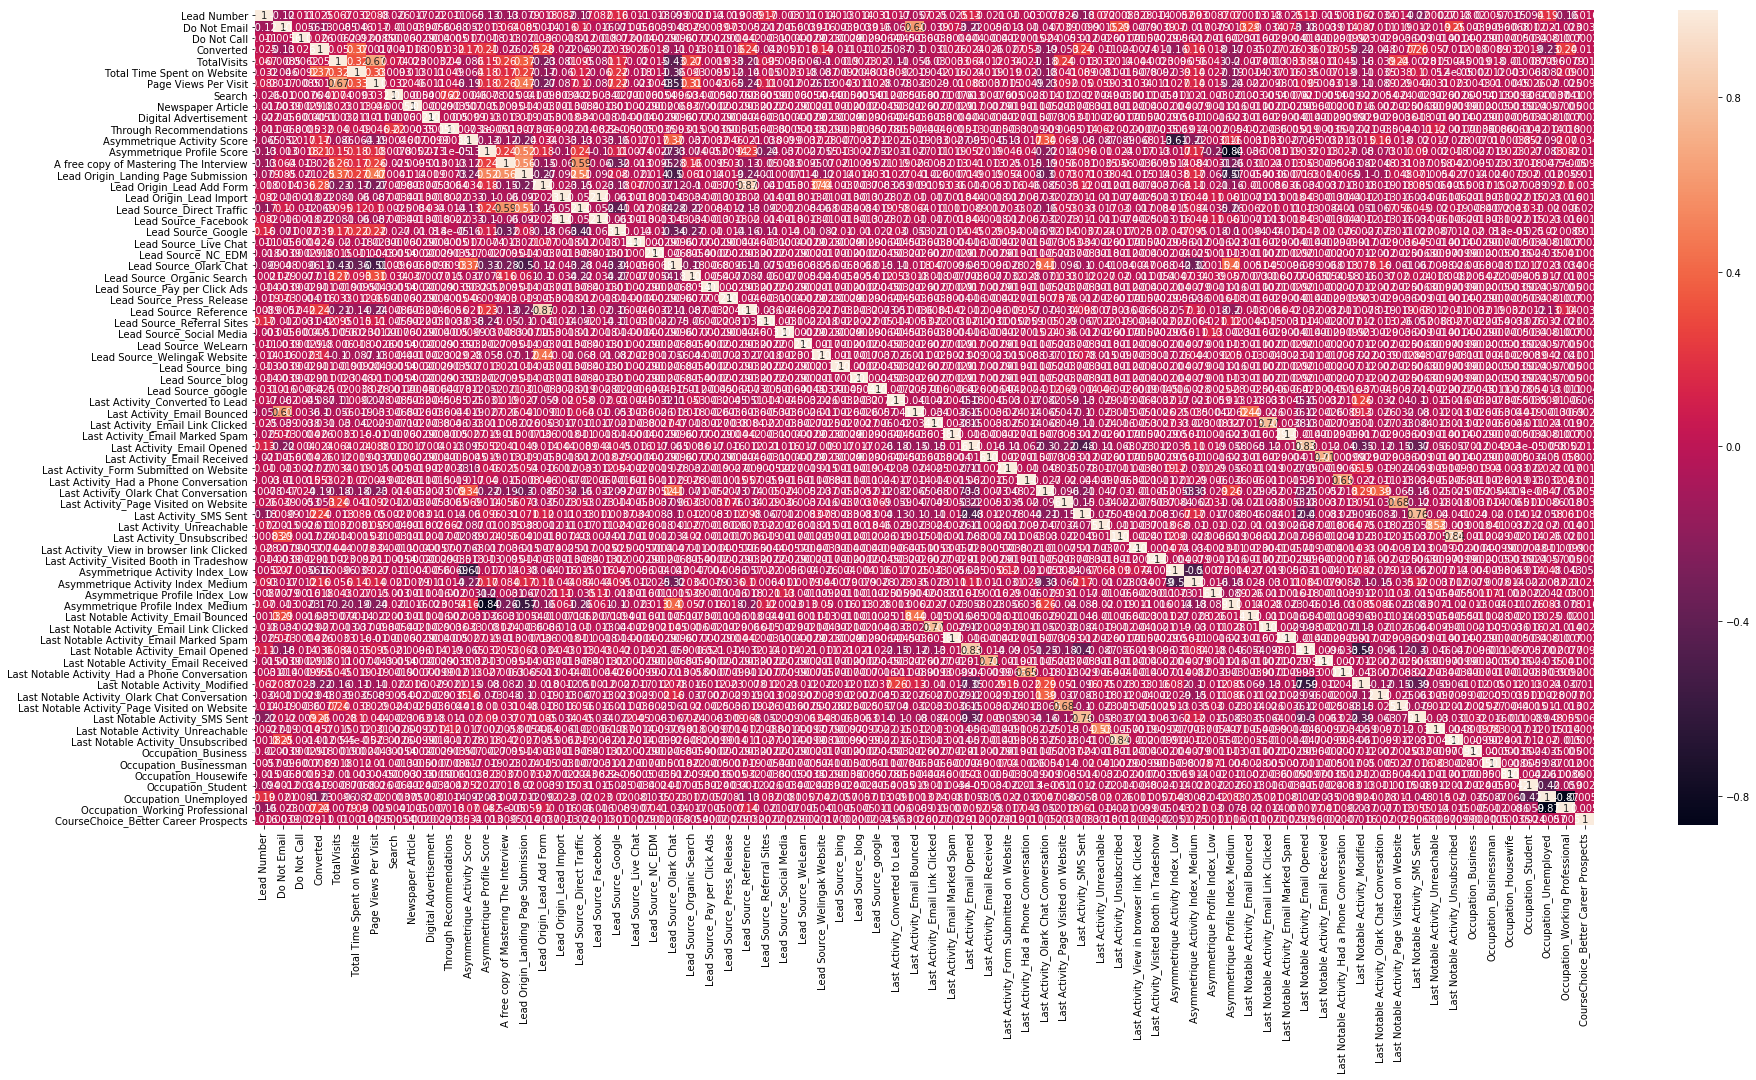

In [1168]:
#Checking for correlation
plt.figure(figsize = (30,15))      
sns.heatmap(leads.corr(),annot = True)
plt.show()

In [1169]:
# Highly correlated data points
corr_matrix = leads.corr().abs()
high_corr_var=np.where(corr_matrix>0.8)
high_corr_var=[(corr_matrix.index[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('Asymmetrique Profile Score', 'Asymmetrique Profile Index_Medium'),
 ('Lead Origin_Lead Add Form', 'Lead Source_Reference'),
 ('Lead Origin_Lead Import', 'Lead Source_Facebook'),
 ('Last Activity_Email Marked Spam',
  'Last Notable Activity_Email Marked Spam'),
 ('Last Activity_Email Opened', 'Last Notable Activity_Email Opened'),
 ('Last Activity_Unsubscribed', 'Last Notable Activity_Unsubscribed'),
 ('Occupation_Unemployed', 'Occupation_Working Professional')]

In [1170]:
leads[['Asymmetrique Profile Score', 'Asymmetrique Profile Index_Medium','Lead Origin_Lead Add Form', 'Lead Source_Reference',
      'Lead Origin_Lead Import', 'Lead Source_Facebook','Last Activity_Email Marked Spam',
       'Last Notable Activity_Email Marked Spam','Last Activity_Email Opened', 'Last Notable Activity_Email Opened',
      'Last Activity_Unsubscribed', 'Last Notable Activity_Unsubscribed','Occupation_Unemployed', 
       'Occupation_Working Professional']].corr()

,Asymmetrique Profile Score,Asymmetrique Profile Index_Medium,Lead Origin_Lead Add Form,Lead Source_Reference,Lead Origin_Lead Import,Lead Source_Facebook,Last Activity_Email Marked Spam,Last Notable Activity_Email Marked Spam,Last Activity_Email Opened,Last Notable Activity_Email Opened,Last Activity_Unsubscribed,Last Notable Activity_Unsubscribed,Occupation_Unemployed,Occupation_Working Professional
Asymmetrique Profile Score,1.000000,-0.836694,0.181125,0.229954,-0.104195,-0.104195,0.018530,0.018530,0.051986,0.032150,0.023732,0.017546,-0.082646,0.081690
Asymmetrique Profile Index_Medium,-0.836694,1.000000,-0.160446,-0.201539,0.061087,0.061087,-0.022548,-0.022548,-0.057884,-0.045850,-0.019394,-0.019722,0.082595,-0.077975
Lead Origin_Lead Add Form,0.181125,-0.160446,1.000000,0.872375,-0.023320,-0.023320,0.035799,0.035799,-0.013974,-0.033542,-0.001781,0.005493,-0.092428,0.102159
Lead Source_Reference,0.229954,-0.201539,0.872375,1.000000,-0.020344,-0.020344,0.041757,0.041757,-0.012136,-0.032475,0.003569,0.010883,-0.128640,0.138740
Lead Origin_Lead Import,-0.104195,0.061087,-0.023320,-0.020344,1.000000,1.000000,-0.001792,-0.001792,0.043537,0.042861,-0.007414,-0.006223,0.022686,-0.016449
Lead Source_Facebook,-0.104195,0.061087,-0.023320,-0.020344,1.000000,1.000000,-0.001792,-0.001792,0.043537,0.042861,-0.007414,-0.006223,0.022686,-0.016449
Last Activity_Email Marked Spam,0.018530,-0.022548,0.035799,0.041757,-0.001792,-0.001792,1.000000,1.000000,-0.016473,-0.013639,-0.001673,-0.001404,0.008095,-0.007024
Last Notable Activity_Email Marked Spam,0.018530,-0.022548,0.035799,0.041757,-0.001792,-0.001792,1.000000,1.000000,-0.016473,-0.013639,-0.001673,-0.001404,0.008095,-0.007024
Last Activity_Email Opened,0.051986,-0.057884,-0.013974,-0.012136,0.043537,0.043537,-0.016473,-0.016473,1.000000,0.827957,-0.068140,-0.057191,-0.005846,0.005234
Last Notable Activity_Email Opened,0.032150,-0.045850,-0.033542,-0.032475,0.042861,0.042861,-0.013639,-0.013639,0.827957,1.000000,-0.056417,-0.047352,-0.002006,0.007671


Keeping these columns as-is and using the RFE to eliminate the features. 

## 4 Model Building using RFE

In [1171]:
logreg = LogisticRegression()
rfe = RFE(logreg, 20)            
rfe = rfe.fit(X_train, y_train)

In [1172]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 36),
 ('TotalVisits', False, 39),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 38),
 ('Search', False, 16),
 ('Newspaper Article', False, 18),
 ('Digital Advertisement', False, 21),
 ('Through Recommendations', False, 24),
 ('Asymmetrique Activity Score', True, 1),
 ('Asymmetrique Profile Score', False, 5),
 ('A free copy of Mastering The Interview', False, 46),
 ('Lead Origin_Landing Page Submission', False, 4),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 23),
 ('Lead Source_Direct Traffic', False, 9),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 10),
 ('Lead Source_Live Chat', False, 34),
 ('Lead Source_NC_EDM', False, 35),
 ('Lead Source_Olark Chat', False, 33),
 ('Lead Source_Organic Search', False, 11),
 ('Lead Source_Pay per Click Ads', False, 51),
 ('Lead Source_Press_Release', False, 42),
 ('Lead Source_Reference', False, 47),
 ('Lead Source_

In [1173]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'Digital Advertisement', 'Through Recommendations',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Las

Building the first model for 20 variables basis RFE

In [1174]:
X_train_sm = sm.add_constant(X_train[col])
log_m_1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m_1.fit()
print(res.summary())
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3463
Model:                            GLM   Df Residuals:                     3442
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1384.6
Date:                Mon, 18 Nov 2019   Deviance:                       2769.3
Time:                        20:11:09   Pearson chi2:                 3.66e+03
No. Iterations:                    20   Covariance Type:             nonrobust
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                        -20.2318   2.92e+04   

,Features,VIF
19,CourseChoice_Better Career Prospects,16.47
14,Asymmetrique Activity Index_Medium,14.25
13,Asymmetrique Activity Index_Low,5.54
2,Asymmetrique Activity Score,4.21
0,Do Not Email,2.06
7,Last Activity_Email Bounced,1.85
9,Last Activity_Olark Chat Conversation,1.56
3,Lead Origin_Lead Add Form,1.42
16,Last Notable Activity_SMS Sent,1.36
5,Lead Source_Welingak Website,1.26


Rebuilding the model eliminating features having high probability

In [1175]:
col = col.drop('CourseChoice_Better Career Prospects', 1)
X_train_new = X_train[col]
X_train_sm = sm.add_constant(X_train_new)
log_m_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m_2.fit()
print(res.summary())
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3463
Model:                            GLM   Df Residuals:                     3443
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1384.6
Date:                Mon, 18 Nov 2019   Deviance:                       2769.3
Time:                        20:11:10   Pearson chi2:                 3.66e+03
No. Iterations:                    19   Covariance Type:             nonrobust
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -3.1481      0.208   

,Features,VIF
2,Asymmetrique Activity Score,2.36
13,Asymmetrique Activity Index_Low,2.13
0,Do Not Email,2.06
14,Asymmetrique Activity Index_Medium,1.91
7,Last Activity_Email Bounced,1.85
9,Last Activity_Olark Chat Conversation,1.48
3,Lead Origin_Lead Add Form,1.42
16,Last Notable Activity_SMS Sent,1.34
5,Lead Source_Welingak Website,1.25
11,Last Activity_Unsubscribed,1.19


In [1176]:
col = col.drop('Occupation_Housewife', 1)
X_train_new = X_train[col]
X_train_sm = sm.add_constant(X_train_new)
log_m_3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m_3.fit()
print(res.summary())
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3463
Model:                            GLM   Df Residuals:                     3444
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1386.9
Date:                Mon, 18 Nov 2019   Deviance:                       2773.7
Time:                        20:11:10   Pearson chi2:                 3.66e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -3.1366      0.208   

,Features,VIF
2,Asymmetrique Activity Score,2.36
13,Asymmetrique Activity Index_Low,2.13
0,Do Not Email,2.06
14,Asymmetrique Activity Index_Medium,1.91
7,Last Activity_Email Bounced,1.85
9,Last Activity_Olark Chat Conversation,1.48
3,Lead Origin_Lead Add Form,1.42
16,Last Notable Activity_SMS Sent,1.34
5,Lead Source_Welingak Website,1.25
11,Last Activity_Unsubscribed,1.19


In [1177]:
col = col.drop('Last Activity_View in browser link Clicked', 1)
X_train_new = X_train[col]
X_train_sm = sm.add_constant(X_train_new)
log_m_4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m_4.fit()
print(res.summary())
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3463
Model:                            GLM   Df Residuals:                     3445
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1387.8
Date:                Mon, 18 Nov 2019   Deviance:                       2775.5
Time:                        20:11:10   Pearson chi2:                 3.65e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.1259      0.207    -15.0

,Features,VIF
2,Asymmetrique Activity Score,2.36
12,Asymmetrique Activity Index_Low,2.12
0,Do Not Email,2.06
13,Asymmetrique Activity Index_Medium,1.91
7,Last Activity_Email Bounced,1.85
9,Last Activity_Olark Chat Conversation,1.48
3,Lead Origin_Lead Add Form,1.42
15,Last Notable Activity_SMS Sent,1.34
5,Lead Source_Welingak Website,1.25
11,Last Activity_Unsubscribed,1.19


In [1178]:
col = col.drop('Lead Source_Facebook', 1)
X_train_new = X_train[col]
X_train_sm = sm.add_constant(X_train_new)
log_m_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m_5.fit()
print(res.summary())
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3463
Model:                            GLM   Df Residuals:                     3446
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1388.9
Date:                Mon, 18 Nov 2019   Deviance:                       2777.9
Time:                        20:11:11   Pearson chi2:                 3.64e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.1156      0.207    -15.0

,Features,VIF
2,Asymmetrique Activity Score,2.36
11,Asymmetrique Activity Index_Low,2.12
0,Do Not Email,2.06
12,Asymmetrique Activity Index_Medium,1.88
6,Last Activity_Email Bounced,1.85
8,Last Activity_Olark Chat Conversation,1.48
3,Lead Origin_Lead Add Form,1.42
14,Last Notable Activity_SMS Sent,1.34
4,Lead Source_Welingak Website,1.25
10,Last Activity_Unsubscribed,1.19


### 4.1 Predicting for Train set

In [1179]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number
0,0,0.044058,643040
1,1,0.794716,584198
2,0,0.095979,648886
3,1,0.129027,650892
4,0,0.373156,581167


### 4.2 Predicting Conversion basis 0.5 

In [1180]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,Predicted
0,0,0.044058,643040,0
1,1,0.794716,584198,1
2,0,0.095979,648886,0
3,1,0.129027,650892,0
4,0,0.373156,581167,0


### 4.3 Calculating the Accuracy, Sensitivity & Specificity

In [1181]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[1912  247]
 [ 391  913]]


In [1182]:
print('Accuracy: ', metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))
# Let us calculate specificity
print('Specifitivity: ', TN / float(TN+FP))
# Calculate false postive rate - predicting conversion when customer does has not been converted
print('False Positive Rate: ', FP/ float(TN+FP))

Accuracy:  0.8157666762922322
Sensitivity:  0.7001533742331288
Specifitivity:  0.8855951829550718
False Positive Rate:  0.1144048170449282


### 4.4 ROC Curve to check the accuracy of the test with tradeoff between Sensitivity & Specificity

In [1183]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

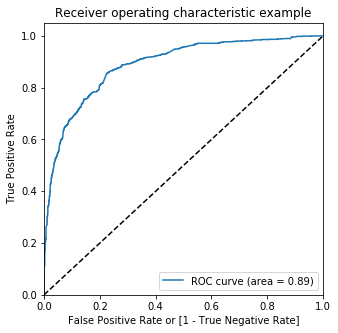

In [1184]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob,
                                         drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### 4.5 Calculate the optimum value for the cut-off considering the trade-off

In [1185]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.044058,643040,0,1,0,0,0,0,0,0,0,0,0
1,1,0.794716,584198,1,1,1,1,1,1,1,1,1,0,0
2,0,0.095979,648886,0,1,0,0,0,0,0,0,0,0,0
3,1,0.129027,650892,0,1,1,0,0,0,0,0,0,0,0
4,0,0.373156,581167,0,1,1,1,1,0,0,0,0,0,0


In [1186]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.376552,1.000000,0.000000
0.1,0.1,0.646260,0.971626,0.449745
0.2,0.2,0.758591,0.901840,0.672070
0.3,0.3,0.795553,0.868098,0.751737
0.4,0.4,0.812590,0.767638,0.839741
0.5,0.5,0.815767,0.700153,0.885595
0.6,0.6,0.820964,0.648773,0.924965
0.7,0.7,0.798441,0.546779,0.950440
0.8,0.8,0.769853,0.425613,0.977767
0.9,0.9,0.729137,0.299847,0.988421


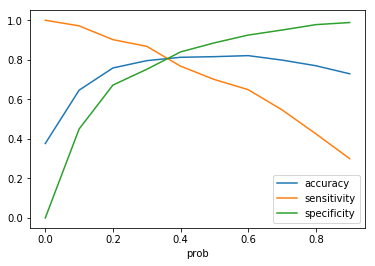

In [1187]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

Taking the value of 0.37 as the optimal value of intersection.

### 4.6 Calculating Accuracy, Specificity & Sensitivity for Optimum value

In [1188]:
# Predicting for the optimum value of 0.38
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.044058,643040,0,1,0,0,0,0,0,0,0,0,0
1,1,0.794716,584198,1,1,1,1,1,1,1,1,1,0,0
2,0,0.095979,648886,0,1,0,0,0,0,0,0,0,0,0
3,1,0.129027,650892,0,1,1,0,0,0,0,0,0,0,0
4,0,0.373156,581167,0,1,1,1,1,0,0,0,0,0,0


In [1189]:
print('Accuracy: ', metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
#print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))
# Let us calculate specificity
print('Specifitivity: ', TN / float(TN+FP))
# Calculate false postive rate - predicting conversion when customer does has not been converted
print('False Positive Rate: ', FP/ float(TN+FP))

Accuracy:  0.811146404851285
Sensitivity:  0.7791411042944786
Specifitivity:  0.8304770727188513
False Positive Rate:  0.16952292728114868


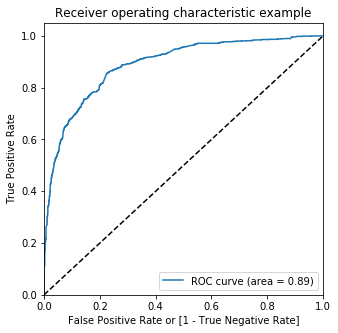

In [1190]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob,
                                         drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

# 5 Making Predictions on the test data

In [1191]:
X_test[scaleList] = scaler.transform(X_test[scaleList])
X_test = X_test[col]

In [1192]:
X_test.shape

(1485, 16)

In [1193]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Conversion_Prob':y_test_pred})
#y_test_pred_final['Lead Number'] = y_test.index
y_test_pred_final.head()

,Converted,Conversion_Prob
Lead Number,,
588921,0,0.316671
636449,0,0.179660
579920,0,0.059791
581356,0,0.373322
617405,1,0.506888


In [1194]:
y_test_pred_final['Predicted'] = y_test_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_test_pred_final.head()

,Converted,Conversion_Prob,Predicted
Lead Number,,,
588921,0,0.316671,0
636449,0,0.179660,0
579920,0,0.059791,0
581356,0,0.373322,0
617405,1,0.506888,1


In [1195]:
print('Accuracy: ', metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))
# Confusion matrix 
confusion_test = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted)
#print(confusion)
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))
# Let us calculate specificity
print('Specifitivity: ', TN / float(TN+FP))
# Calculate false postive rate - predicting conversion when customer does has not been converted
print('False Positive Rate: ', FP/ float(TN+FP))

Accuracy:  0.7952861952861953
Sensitivity:  0.7311827956989247
Specifitivity:  0.8338727076591155
False Positive Rate:  0.16612729234088458


In [1196]:
train_conversion = (sum(y_train_pred_final['Predicted'])/len(y_train_pred_final['Predicted'].index))*100
test_conversion = (sum(y_test_pred_final['Predicted'])/len(y_test_pred_final['Predicted'].index))*100
print('Train Conversion Rate: ',train_conversion)
print('Test Conversion Rate: ',test_conversion)

Train Conversion Rate:  39.90759457118106
Test Conversion Rate:  37.84511784511784


# 6 Lead Score for the model 

In [1197]:
y_train_pred_final['Lead Score'] = round(y_train_pred_final['Conversion_Prob']*100,2)
y_test_pred_final['Lead Score'] = round(y_test_pred_final['Conversion_Prob']*100,2)

In [1198]:
y_test_pred_final.reset_index(inplace=True)

In [1199]:
Lead_Score = pd.concat([y_train_pred_final[['Conversion_Prob','Converted','Lead Number','Predicted','Lead Score']],
                        y_test_pred_final[['Conversion_Prob','Converted','Lead Number','Predicted','Lead Score']]])
Lead_Score.head()

,Conversion_Prob,Converted,Lead Number,Predicted,Lead Score
0,0.044058,0,643040,0,4.41
1,0.794716,1,584198,1,79.47
2,0.095979,0,648886,0,9.60
3,0.129027,1,650892,0,12.90
4,0.373156,0,581167,0,37.32


In [1200]:
Lead_Score.shape

(4948, 5)